# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
import os
data_path = os.getcwd()[:-8]+r'Data'
data_path

'C:\\Users\\ck24\\ACE_592\\Pollution_Sp21\\Data'

In [3]:
#data_path = r"C:\Users\gv4\Box\2. Research\Air Pollution and Prediction\Git_Pollution\Pollution_Sp21\Output"

data_path = r"C:\Users\ck24\Box\Pollution_Sp21\Output"

data_wide = pd.read_csv(data_path+"\Data_Final_wide.csv")
data_long = pd.read_csv(data_path+"\Data_Final_long.csv")


## Long Data

In [4]:
data_x = data_long.drop(columns = ["year","gva_r"])
data_y = data_long[["gva_r"]]

In [5]:
# Creating a function for interaction terms for Lasso using Polynomial Features
def interaction_terms(data):
    interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False)
    output = interaction.fit_transform(data)
    c_names = interaction.get_feature_names(data.columns)
    return output,c_names

output, colnames = interaction_terms(data_x)

In [6]:
data_X = pd.DataFrame(output, columns= colnames)
data_y = data_long[["gva_r"]]

In [49]:
data_long.dropreset_index()

,index,Shape_Area,poll_min,poll_max,poll_mean,poll_std,year,night_min,night_max,night_mean,...,std_tmax_06,std_tmax_07,std_tmax_08,std_tmax_09,std_tmax_10,std_tmax_11,std_tmax_12,sqkms,tpop,gva_r
0,0,0.102900,7.9,12.4,9.569089,0.696506,2009,0.0,59.0,20.200537,...,0.2476,0.3503,0.3047,0.3052,0.2808,0.3306,0.4480,1805.399048,851607.0,4.802176e+07
1,1,0.102900,6.9,11.3,8.319476,0.720867,2014,6.0,63.0,23.087162,...,0.2522,0.2996,0.3215,0.2499,0.2510,0.2174,0.2423,1805.399048,851607.0,3.902378e+07
2,2,0.048057,7.6,10.1,8.709792,0.524214,2009,0.0,32.0,9.172662,...,0.1974,0.2284,0.3830,0.2456,0.2393,0.2468,0.1841,541.353821,45492.0,6.141719e+04
3,3,0.048057,6.4,8.6,7.404792,0.424360,2014,6.0,36.0,9.604076,...,0.2148,0.2405,0.2676,0.2754,0.2294,0.2260,0.2566,541.353821,45492.0,5.684490e+05
4,4,0.081518,6.7,9.1,7.951542,0.487634,2009,0.0,51.0,4.073316,...,0.9336,0.9800,1.0040,0.9170,0.8364,0.7476,0.6960,947.802124,54136.0,4.301065e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,4361,0.032921,4.8,8.0,6.820732,0.559886,2014,0.0,23.0,7.791845,...,0.3467,0.3574,0.3447,0.3645,0.2352,0.2429,0.1802,382.672913,18490.0,6.218300e+04
4362,4362,0.190977,4.7,8.6,7.185063,0.433699,2009,0.0,44.0,1.737645,...,0.5050,0.5605,0.6540,0.5140,0.5770,0.5580,0.5000,2202.593018,29395.0,1.244241e+05
4363,4363,0.190977,3.8,7.2,6.116510,0.415798,2014,0.0,37.0,5.369858,...,0.5825,0.6562,0.6520,0.6100,0.4500,0.4658,0.5757,2202.593018,29395.0,1.390050e+05
4364,4364,0.038812,5.2,8.1,6.780315,0.417159,2009,0.0,59.0,13.702317,...,0.1841,0.3100,0.4973,0.2550,0.2345,0.2163,0.1267,446.231598,138176.0,3.004499e+06


## Lasso with Interaction Terms:

In [7]:
# Normalizing data with StandardScaler()
X = StandardScaler().fit_transform(data_X)
y = StandardScaler().fit_transform(data_y)

In [20]:
X_keep = pd.DataFrame(X, columns= data_X.columns).reset_index()
y_keep = pd.DataFrame(y, columns= data_y.columns).reset_index()

In [23]:
# Split sample into training, validation, testing:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# Create a validation set (to use untouched test data for later)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [21]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_keep, y_keep, test_size=0.1, random_state=0)

In [44]:
print(X_test_k.Shape_Area.nunique())

print(len(X_test_k))
X_test_k

414
437


,index,Shape_Area,poll_min,poll_max,poll_mean,poll_std,night_min,night_max,night_mean,night_std,...,std_tmax_10 std_tmax_11,std_tmax_10 std_tmax_12,std_tmax_10 sqkms,std_tmax_10 tpop,std_tmax_11 std_tmax_12,std_tmax_11 sqkms,std_tmax_11 tpop,std_tmax_12 sqkms,std_tmax_12 tpop,sqkms tpop
3630,3630,-0.404531,0.107633,1.798731,0.069806,-0.091485,-0.356225,-0.195048,0.076490,0.104418,...,-0.367295,-0.395542,-0.320573,-0.255333,-0.189901,-0.293346,-0.170225,-0.290271,-0.190187,-0.167216
2945,2945,-0.271186,0.107633,0.453061,0.069806,-0.091485,-0.356225,-0.955566,-0.454808,-0.388245,...,-0.063251,-0.094817,-0.234498,-0.274900,-0.072747,-0.230828,-0.250754,-0.235484,-0.239468,-0.169923
2139,2139,-0.432565,0.107633,-0.671404,0.069806,-0.091485,-0.356225,-0.955566,-0.374753,-0.460672,...,-0.567334,-0.533895,-0.339602,-0.305075,-0.508022,-0.340550,-0.281392,-0.318965,-0.263045,-0.173362
2842,2842,-0.216919,0.107633,0.489928,0.069806,-0.091485,-0.356225,-1.056969,-0.749636,-0.905715,...,-0.197698,-0.266012,-0.232078,-0.281951,-0.095210,-0.167668,-0.244566,-0.208205,-0.239250,-0.167470
1109,1109,0.142007,0.107633,-0.450198,0.069806,-0.091485,-0.356225,1.173886,-0.084130,0.238013,...,-0.360784,-0.438046,-0.118673,-0.103355,-0.388534,-0.066096,-0.047893,-0.201661,-0.157717,-0.032920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1191,-0.419627,0.107633,1.761864,0.069806,-0.091485,0.670192,1.528794,2.075866,2.482376,...,-0.459054,-0.401317,-0.324091,-0.181842,-0.401754,-0.326980,-0.187518,-0.304847,-0.153281,-0.165383
3841,3841,-0.383552,0.107633,0.010648,0.069806,-0.091485,0.413588,-0.195048,0.001386,-0.428611,...,-0.542091,-0.508080,-0.323688,-0.277161,-0.493712,-0.332385,-0.268281,-0.311007,-0.249156,-0.168560
2088,2088,-0.445917,0.107633,-0.210558,0.069806,-0.091485,-0.356225,-1.310475,-0.762323,-1.077777,...,-0.567609,-0.540319,-0.340945,-0.306956,-0.508267,-0.340604,-0.281463,-0.320064,-0.264560,-0.173494
381,381,3.020298,0.107633,-0.542367,0.069806,-0.091485,-0.356225,-0.904865,-0.726438,-0.740977,...,2.166348,1.671613,4.764798,-0.269560,1.108683,3.596704,-0.254675,2.458543,-0.244511,-0.145526


In [34]:
y_test_k

,index,gva_r
3630,3630,-0.146721
2945,2945,-0.147755
2139,2139,-0.147914
2842,2842,-0.147943
1109,1109,-0.129688
...,...,...
1191,1191,-0.084027
3841,3841,-0.144523
2088,2088,-0.147865
381,381,-0.147760


## Results with parameter $\alpha$ = 0.05

In [35]:
# Start with random parameter:
lasso_model =Lasso(alpha=.05)
lasso_model = lasso_model.fit(y=y_train,X=X_train)
bool_ = lasso_model.coef_!=0

print("Number of features fed into model: {}".format(len(lasso_model.coef_)))
print("Number of features that are non zero:",sum(bool_))
print("\nFeatures that are non zero:\n",data_X.iloc[:,bool_].columns.tolist())

y_pred = lasso_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("\nLasso with interaction terms: \nRMSE: {}, r2: {}".format(rmse,r2))


Number of features fed into model: 5778
Number of features that are non zero: 19

Features that are non zero:
 ['night_min night_std', 'night_min min_prec_02', 'night_min min_prec_07', 'night_min min_prec_11', 'night_min std_prec_04', 'night_min std_prec_05', 'night_min std_prec_07', 'night_min std_tmax_02', 'night_min std_tmax_03', 'night_std tpop', 'max_prec_01 max_prec_09', 'max_prec_03 max_prec_09', 'min_prec_02 tpop', 'min_prec_03 tpop', 'min_prec_04 tpop', 'min_prec_07 tpop', 'std_prec_09 tpop', 'mean_tmax_07 tpop', 'min_tmax_06 tpop']

Lasso with interaction terms: 
RMSE: 0.3652930887086219, r2: 0.15092581967954788


In [40]:
len(y_val)

393

In [36]:
pd.concat(y_val, y_pred)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [17]:
# Lasso parameter tuning:
def get_cols(alpha):
    lasso_model =Lasso(alpha=alpha)
    lasso_model = lasso_model.fit(y=y_train,X=X_train)   
    coefs = lasso_model.coef_ 
    return coefs!=0

Alpha = np.arange(0,1,0.01)
coef_lists = [list(get_cols(a)) for a in Alpha]

<ipython-input-17-d5b0552af149>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model = lasso_model.fit(y=y_train,X=X_train)
C:\Users\ck24\.conda\envs\ace592\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ck24\.conda\envs\ace592\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.9181592038857, tolerance: 0.3915875616921497
  model = cd_fast.enet_coordinate_descent(
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ck24\.conda\envs\ace592\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-d5b0552af149>", line 9, in <module>
    coef_lists = [list(get_cols(a)) for a in Alpha]
  File "<ipython-input-17-d5b0552af149>", line 9, in <listcomp>
    coef_lists = [list(get_cols(a)) for a in Alpha]
  File "<ipython-input-17-d5b0552af149>", line 4, in get_cols
    lasso_model = lasso_model.fit(y=y_train,X=X_train)
  File "C:\Users\ck24\.conda\envs\ace592\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 832, in fit
    self.path(X, y[:, k],
  File "C:\Users\ck24\.conda\envs\ace592\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\ck24\.conda\envs\ace592\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 529, in enet_path
    model = cd_fast.enet_coordinate_des

TypeError: object of type 'NoneType' has no len()

In [ ]:
plt.plot(Alpha,pd.DataFrame(coef_lists).sum(axis=1))
plt.ylabel("No.of Features")
plt.xlabel("Values of Alpha")
plt.ylim(0,100)
plt.xlim(0,1)

In [ ]:
A = np.arange(.01,0.5,.01)
lasso_model = LassoCV(alphas=A,cv=10)
lasso_model = lasso_model.fit(X_train,y_train)
print("Most optimal value for alpha parameter is:",lasso_model.alpha_)

In [ ]:
y_pred = lasso_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print("\nLasso Cross Validation - interaction terms: \nRMSE: {}, r2: {}".format(rmse,r2))

## Random Forest:

In [41]:
data_x = data_long.drop(columns = ["year","gva_r"])
data_y = data_long[["gva_r"]]


In [31]:
# Normalizing data with StandardScaler()
X = StandardScaler().fit_transform(data_x)
y = StandardScaler().fit_transform(data_y)

In [32]:
X.shape, y.shape

((4366, 107), (4366, 1))

In [33]:
# Split sample into training, validation, testing:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# Create a validation set (to use test for later)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

# Without Hyper-parameter tuning

In [34]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
y_pred_test_ran1 = regr.predict(X_val)


<ipython-input-34-6a24934fea6c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)



Lasso Cross Validation - interaction terms: 
RMSE: 0.22020637038026142, r2: 0.691452181157513


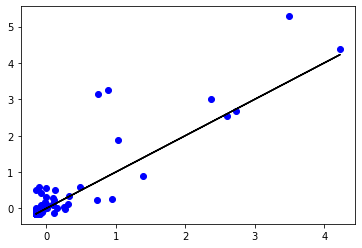

In [36]:
rmse_ran_1 = np.sqrt(mean_squared_error(y_val, y_pred_test_ran1))
r2_ran_1 = r2_score(y_val, y_pred_test_ran1)
print("\nLasso Cross Validation - interaction terms: \nRMSE: {}, r2: {}".format(rmse_ran_1,r2_ran_1))
plt.plot(y_val,y_pred_test_ran1,'o', color = "blue")
plt.plot(y_val,y_val,'k-')
# plt.xlabel("Normalized GDP")
# plt.ylabel("Predicted GDP")
# plt.title("Night Lights Model")
# plt.xlim(0,1)
# plt.ylim(0,1)

## Random Forest Cross Validation (n=5) with grid search 

In [37]:
random_grid = {'n_estimators': [100],
               'max_depth': [100],
               'bootstrap': [True,False]}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(rf,random_grid,n_iter=20,n_jobs=-1,random_state=40)

rf_random.fit(X_train,y_train)

C:\Users\gv4\Anaconda3\envs\ace592\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\gv4\Anaconda3\envs\ace592\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [100],
                                        'n_estimators': [100]},
                   random_state=40)


Random Forest Validation: 
RMSE: 0.23096404449085753, r2: 0.6605690219213067


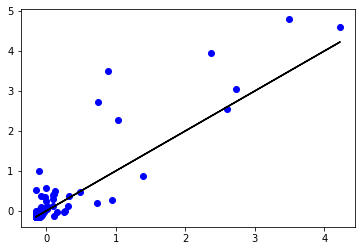

In [38]:
y_pred_rf = rf_random.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2 = r2_score(y_val, y_pred_rf)
print("\nRandom Forest Validation: \nRMSE: {}, r2: {}".format(rmse,r2))
plt.plot(y_val,y_pred_rf,'o', color = "blue")
plt.plot(y_val,y_val,'k-')


## Using Wide Data Format

In [50]:
data_wide.dropna(inplace = True)

In [55]:
Data_x = data_wide.drop(columns = ["ADM1_ES","ADM2_ES","ADM2_PCODE","new_cod","NOM_MUN","gva_r09","gva_r14"])
Data_y = data_wide[["gva_r14"]]

In [52]:
output_wide, colnames_wide = interaction_terms(Data_x)

In [53]:
Data_X = pd.DataFrame(output_wide, columns= colnames_wide)
Data_y = data_wide[["gva_r14"]]
Data_X.shape, Data_y.shape

((2183, 22366), (2183, 1))

In [56]:
# Normalizing data with StandardScaler()
X_ = StandardScaler().fit_transform(Data_X)
y_ = StandardScaler().fit_transform(Data_y)

In [57]:
# Split sample into training, validation, testing:
X_trn, X_tst, y_trn, y_tst = train_test_split(X_, y_, test_size=0.1, random_state=0)
# Create a validation set (to use test for later)
X_train, X_valid, y_train, y_valid = train_test_split(X_trn, y_trn, test_size=0.1, random_state=0)


In [ ]:
A = np.arange(.01,0.5,.1)
lasso_model = LassoCV(alphas=A,cv=10)
lasso_model = lasso_model.fit(X_train,y_train)
print("Most optimal value for alpha parameter is:",lasso_model.alpha_)

C:\Users\gv4\Anaconda3\envs\ace592\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [157]:
y_pred = lasso_model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)
print("\nLasso Cross Validation - interaction terms: \nRMSE: {}, r2: {}".format(rmse,r2))


Lasso Cross Validation - interaction terms: 
RMSE: 1.7891393861166298, r2: 0.09241185906821214


## Random Forest

In [158]:
Data_x = data_wide.drop(columns = ["ADM1_ES","ADM2_ES","ADM2_PCODE","new_cod","NOM_MUN","gva_r09","gva_r14"])
Data_y = data_wide[["gva_r14"]]

In [159]:
# Normalizing data with StandardScaler()
X_ = StandardScaler().fit_transform(Data_x)
y_ = StandardScaler().fit_transform(Data_y)

In [160]:
# Split sample into training, validation, testing:
X_trn, X_tst, y_trn, y_tst = train_test_split(X_, y_, test_size=0.1, random_state=0)
# Create a validation set (to use test for later)
X_trn, X_valid, y_trn, y_valid = train_test_split(X_tr, y_trn, test_size=0.1, random_state=0)


In [ ]:
number_trees = np.arange(200,2000,20)
max_depth = np.arange(10,110,10)
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': number_trees,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': [True,False]}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(rf,random_grid,n_iter=20,n_jobs=-1,random_state=40)

rf_random.fit(X_trn,y_trn)